In [2]:
import pandas as pd

# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details',
#  'categories', 'url'])

minst = pd.read_csv('mnist_sample.csv')
print(minst.info())
print(minst.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel1 to target
dtypes: int64(785)
memory usage: 59.9 MB
None
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'target'],
      dtype='object', length=785)


8 4 8 7 7 0 6 2 7 4 

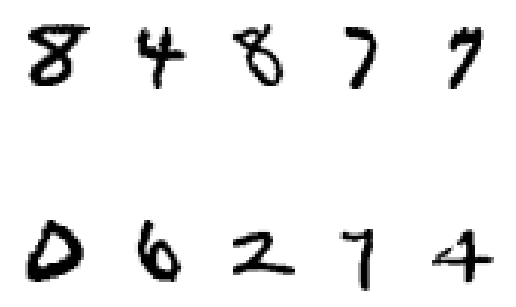

In [3]:
# Display some digits from the minst dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

data = minst.drop("target", axis=1)
X_ = np.array(data) # np.c_[[data]][0]
y = np.array(minst["target"])
for index in range(10):
    some_digit = X_[index]
    # print(some_digit)
    some_digit_image = some_digit.reshape(28, 28)
    plt.subplot(2, 5, index + 1)
    print(y[index], end=' ')
    plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
plt.show()


In [4]:
# split the minst dataset
from sklearn.model_selection import train_test_split

X = minst.drop("target", axis=1)  # Features
target = minst["target"]               # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# print(y_train_5)

In [27]:
# The correct model for predicting digit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import random

COLUMNS = X_train.columns


def generate_handwritten_digit(digit, image_path="handwritten_digit.png"):
    # Create a blank white image (28x28 pixels for MNIST compatibility)
    img = Image.new('L', (28, 28), color=255)  # 'L' mode is for grayscale

    # Get a drawing context
    draw = ImageDraw.Draw(img)

    # Choose a font (you can install some free handwritten fonts or use a basic one)
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Try to use a standard font
    except IOError:
        font = ImageFont.load_default()  # Fallback if the font is not found

    # Randomize the position to make it look more handwritten
    x_pos = random.randint(5, 10)
    y_pos = random.randint(2, 8)

    # Write the digit at the randomized position
    draw.text((x_pos, y_pos), str(digit), font=font, fill=0)  # 0 is black color

    # Save the image to the specified path
    img.save(image_path)
    print(f"Digit {digit} written and saved as {image_path}")

# Example usage
generate_handwritten_digit(7, "handwritten_7.png")

# function to get the a handwriting image from a file
def preprocess_image_to_df(image_path):
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # Convert the image to a numpy array and normalize pixel values
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize to match the training data
    
    # Flatten the 28x28 image into a single row (1, 784) for DataFrame compatibility
    img_flattened = img_array.flatten()
    
    # Convert the flattened image to a pandas DataFrame
    img_df = pd.DataFrame([img_flattened], columns=COLUMNS)
    
    return img_df

# A function to plot a digit
def plot_digits(X_new, images_per_row):
    X_new = np.array(X_new) # np.c_[[data]][0]
    for index in range(len(X_new)):
        some_digit = X_new[index]
        some_digit_image = some_digit.reshape(28, 28)
        plt.subplot(images_per_row, images_per_row, index + 1)
        plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
        plt.axis("off")
    plt.show()

# Create the dataset to clear noises in the digit image
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
# print(pd.DataFrame(noise_train))
X_train_noise = X_train + noise_train
y_train_noise = X_train
X_test_noise = X_test + noise_test
y_test_noise = X_test

# Train a KNeighborClassifier to clean the noises
# print(y_train_noise)
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_noise, y_train_noise)



KNeighborsClassifier()

In [ ]:
# Test the knclf model with prediction
some_digit = X_train_noise.iloc[[120]]
some_digit_ans = y_train_noise.iloc[[120]]
# some_digit_ans = y_train.iloc[156]


kn_pred = kn_clf.predict(some_digit)
plot_digits(kn_pred, images_per_row=2)
plot_digits(some_digit_ans, images_per_row=2)
plot_digits(some_digit, images_per_row=2)


In [11]:
# Train a KNeighbor Classifier model with one versus one
ovo_clf = OneVsOneClassifier(KNeighborsClassifier())
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier())

In [13]:
# Test the ovo_clf model with the training dataset
some_digit = X_train.iloc[[120]]
some_digit_ans = y_train.iloc[[120]]
ovo_clf_pred = ovo_clf.predict(some_digit)
print(ovo_clf_pred, some_digit_ans.values)

[7] [7]


In [18]:
# Evaluate ovo_clf model

# Check the score
ovo_scores = cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy')
print(ovo_scores)

# Predict using cross validation
ovo_predictions = cross_val_predict(ovo_clf, X_train, y_train, cv=3)
# Check the precision, recall, f1_score
ovo_precision = precision_score(y_train, ovo_predictions, average='macro')
ovo_recall = recall_score(y_train, ovo_predictions, average='macro')


[0.93888264 0.92950881 0.93060765]
precision_score --  [9 9 5 ... 3 7 1]
ovo_recall --  0.931805528071173


In [29]:
print("ovo_recall -- ", ovo_recall)
print("precision_score -- ", ovo_precision)
f1_score_res = f1_score(y_train, ovo_predictions, average='macro')
print("F1 Score --", f1_score_res)
# print(my_image)

ovo_recall --  0.931805528071173
precision_score --  0.9359118380425141
F1 Score -- 0.9329283553678771
     pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0  0.568627  0.576471  0.580392  0.584314  0.588235  0.592157  0.592157   

   pixel8  pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  \
0     0.6     0.6      0.6  ...  0.407843  0.435294  0.521569   0.54902   

   pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0   0.54902   0.54902   0.54902  0.545098  0.545098  0.541176  

[1 rows x 784 columns]


[1]


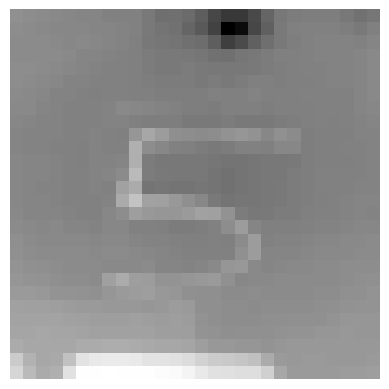

In [32]:
my_image = preprocess_image_to_df("snap_image.jpg")
print(ovo_clf.predict(my_image))
plot_digits(my_image, images_per_row=1)
# print(my_image)


In [4]:
# Train a binary classifier model
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train_5)
predictions = sdg_clf.predict(X_test)
print(predictions)
print(np.array(y_test_5))

[False False False ... False  True False]
[False False False ... False  True  True]


In [5]:
# Evaluate the model with cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sdg_clf)
    # print(train_index)
    # Use .iloc to access rows by index
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred), f"----{n_correct}---{len(y_pred)}")


0.9523809523809523 ----2540---2667
0.9598800149981253 ----2560---2667
0.9561140285071268 ----2549---2666


In [6]:
# Evaluate the model using K-fold validation
from sklearn.model_selection import cross_val_score

result = cross_val_score(sdg_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(result)

[0.94225722 0.95388076 0.95048762]


In [7]:
# Evaluation with confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3)
con_matrix_res = confusion_matrix(y_train_5, y_train_pred)
print(con_matrix_res)



[[7047  201]
 [ 208  544]]


In [8]:
# get the precision and recall rate
from sklearn.metrics import precision_score, recall_score
precision_score_res = precision_score(y_train_5, y_train_pred)
recall_score_res = recall_score(y_train_5, y_train_pred)
print("precision score --", precision_score_res)
print("recall score --", recall_score_res)

precision score -- 0.7302013422818792
recall score -- 0.723404255319149


In [9]:
# get the F1 score
from sklearn.metrics import f1_score
f1_score_res = f1_score(y_train_5, y_train_pred)
print("F1 Score --", f1_score_res)

F1 Score -- 0.7267869071476285


In [10]:
# manipulating the threshold
# Decisioin function is used to get the score
y_scores = sdg_clf.decision_function(X_train)
threshold = 800
print(y_scores)
y_some_digit_pred = (y_scores > threshold)
print(list(y_some_digit_pred).count(True))
print(list(y_some_digit_pred).count(False))

[-114242.98197395 -181180.07511244 -245031.10345985 ... -125904.68372087
 -299381.89195727 -225413.04388381]
472
7528


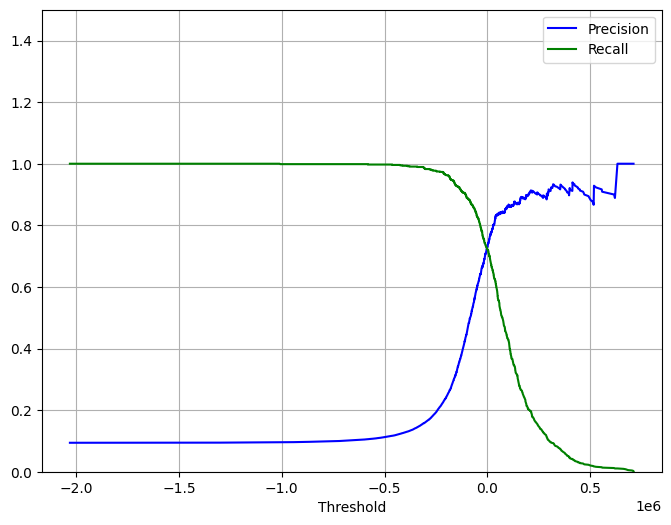

In [11]:
# get the prediction scores
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
# print(precisions)
# print(recalls)
# print(thresholds)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # i want the graph to have grid lines that will trace the various thresholds
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1.5])
    plt.grid()
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


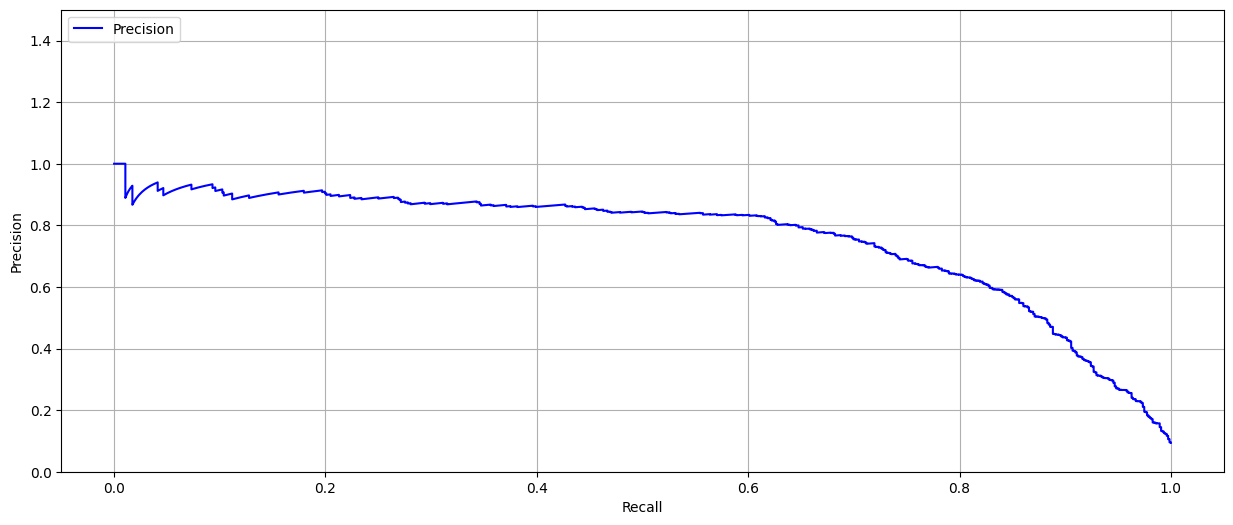

In [12]:
# plot precisions agains recall
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(15, 6))
    plt.plot(recalls, precisions, "b-", label="Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.ylim([0, 1.5])
    plt.grid()
    plt.show()

plot_precision_vs_recall(precisions, recalls)

In [13]:
# Threshold that gives 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

199431.03482764657
0.9005847953216374
0.2047872340425532


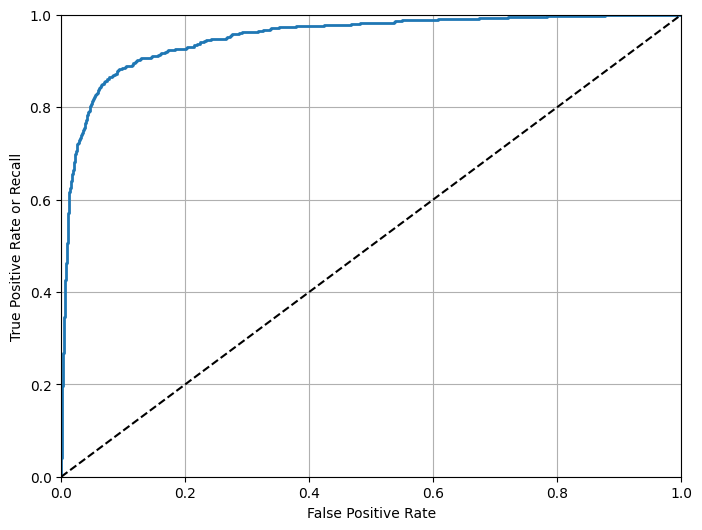

In [14]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    # plt.axis([1, 0, 1, 0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate or Recall')
    plt.grid()
    # plt.show()

plot_roc_curve(fpr, tpr)
plt.show()

In [15]:
# measure the roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score_res = roc_auc_score(y_train_5, y_scores)
print(roc_auc_score_res)

0.9520084043727397


In [16]:
# Train another model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(random_forest_model, X_train, y_train_5, cv=3, method='predict_proba')
print(y_probas_forest)



[[1.   0.  ]
 [0.98 0.02]
 [0.92 0.08]
 ...
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]]


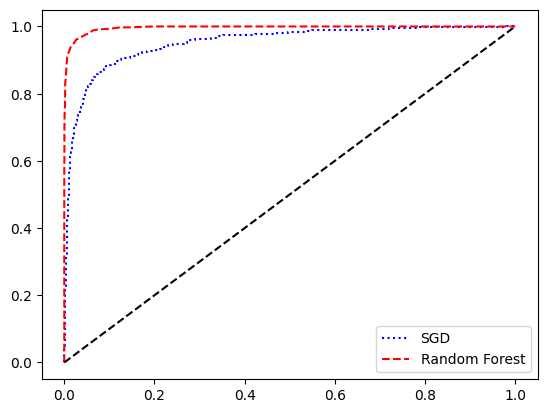

In [17]:
# plot the roc curve of RandomForestClassfier model and SDGClassifier
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "r--", label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
# plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [18]:
# print the roc_auc_curve score of RandomForestClassifier Model
print(roc_auc_score(y_train_5, y_scores_forest))
y_scores_forest_pred = cross_val_predict(random_forest_model, X_train, y_train_5, cv=3, method="predict")
precision_score_fr = precision_score(y_train_5, y_scores_forest_pred)
recall_score_fr = recall_score(y_train_5, y_scores_forest_pred)
print("precision_score -- ", precision_score_fr)
print("recall score -- ", recall_score_fr)

0.996133195951341
precision_score --  0.9926739926739927
recall score --  0.7207446808510638


In [19]:
# One versus all binary classifier method
sdg_clf.fit(X_train, y_train)
ans = sdg_clf.predict(X_train.iloc[[9]])
print(ans, y_train.iloc[9])


[8] 8


In [20]:
ans = sdg_clf.predict(X_train.iloc[[156]])
print(ans, y_train.iloc[156])
print(sdg_clf.classes_)

[5] 5
[0 1 2 3 4 5 6 7 8 9]


In [21]:
print(type(X_train))
print(X_train.iloc[[0]])
# print(np.array(X_train.iloc[0]).reshape(-1, 1))
# print(y_train.iloc[0])

<class 'pandas.core.frame.DataFrame'>
      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
9254       0       0       0       0       0       0       0       0       0   

      pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
9254        0  ...         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  pixel784  
9254         0         0         0         0         0  

[1 rows x 784 columns]


In [57]:
# Train a model with OneVsOne
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

some_digit = X_train.iloc[[156]]
some_digit_ans = y_train.iloc[156]
ovo_clf = OneVsOneClassifier(KNeighborsClassifier())
ovo_clf.fit(X_train, y_train)
ans = ovo_clf.predict(some_digit)
print(ans, some_digit_ans)


[5] 5


In [58]:
print(len(ovo_clf.estimators_))
sdg_clf_scores = cross_val_score(sdg_clf, X_train, y_train, cv=3, scoring='accuracy')
print("sdg_clf", sdg_clf_scores)
ovo_clf_scores = cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy')
print("ovo_clf", ovo_clf_scores)

45
sdg_clf [0.87926509 0.86089239 0.85821455]
ovo_clf [0.93888264 0.92950881 0.93060765]


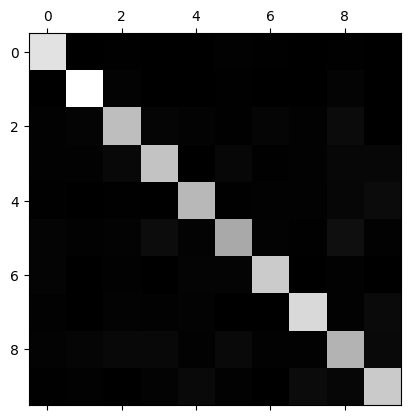

In [24]:
# Error Analysis
y_sdg_clf_predict = cross_val_predict(sdg_clf, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_sdg_clf_predict)
# print(con_matrix)
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

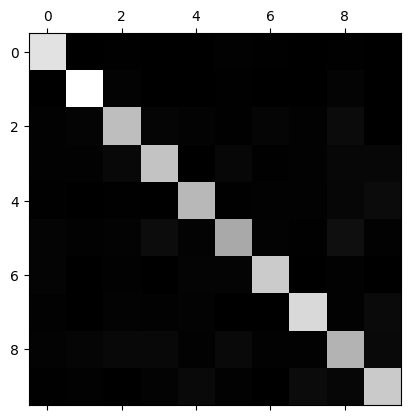

In [25]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

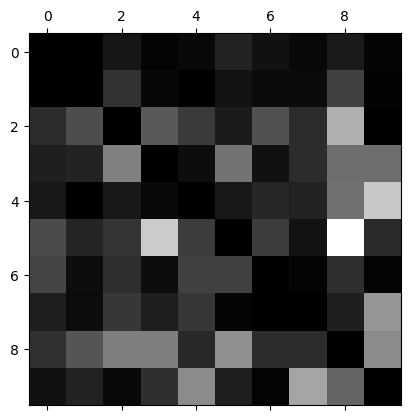

In [26]:
# replot the confusion matrix to display the error

row_sums = conf_matrix.sum(axis=1, keepdims=True)
# print(row_sums)
norm_conf_matrix = conf_matrix / row_sums
# print(conf_matrix)
# print(norm_conf_matrix)
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

In [27]:
# import matplotlib.pyplot as plt

# def plot_digits(images, images_per_row=5):
#     """Plots a list of digit images in a grid format.

#     Args:
#         images (array-like): Array of images to plot.
#         images_per_row (int): Number of images to display per row.
#     """
#     # Calculate the number of rows needed
#     n_images = len(images)
#     n_rows = (n_images + images_per_row - 1) // images_per_row  # Ceiling division

#     # Create a figure with subplots
#     plt.figure(figsize=(images_per_row, n_rows))
    
#     for i in range(n_images):
#         plt.subplot(n_rows, images_per_row, i + 1)
#         plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 if using MNIST
#         plt.axis('off')  # Hide axes

#     plt.show()


In [33]:
def plot_digits(X_new, images_per_row):
    X_new = np.array(X_new) # np.c_[[data]][0]
    # y = np.array(minst["target"])
    for index in range(len(X_new)):
        some_digit = X_new[index]
        some_digit_image = some_digit.reshape(28, 28)
        plt.subplot(images_per_row, images_per_row, index + 1)
        plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
        plt.axis("off")
    plt.show()

668


/tmp/ipykernel_910/3053369089.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(images_per_row, images_per_row, index + 1)


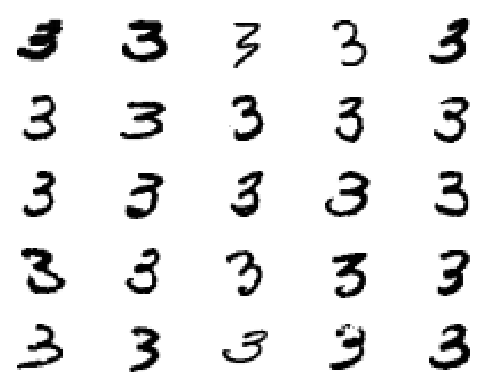

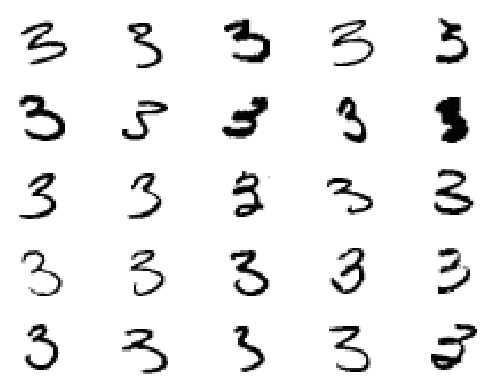

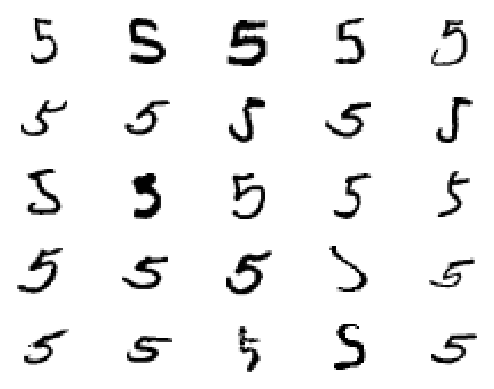

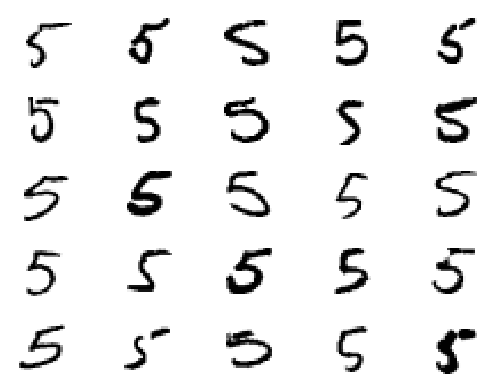

In [37]:

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_sdg_clf_predict == cl_a)] # y_train == 3 and y_pred == 3
X_ab = X_train[(y_train == cl_a) & (y_sdg_clf_predict == cl_b)] # y_train == 3 and y_pred == 5
X_ba = X_train[(y_train == cl_b) & (y_sdg_clf_predict == cl_a)] # y_train == 5 and y_pred == 3
X_bb = X_train[(y_train == cl_b) & (y_sdg_clf_predict == cl_b)] # y_train == 5 and y_pred == 5

# print(list(y_train))
# print(list(y_sdg_clf_predict))
print(len(X_aa))
# print(y_train)

# plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) 
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()




In [40]:
# Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

# This model will classifier if a digit is large and also an even number
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 0)
y_multi_label = np.c_[y_train_large, y_train_odd]
# print(y_multi_label)
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_multi_label)




KNeighborsClassifier()

In [45]:
some_digit = X_train.iloc[[1]]
some_digit_ans = y_train.iloc[1]

kn_pred = kn_model.predict(some_digit)
print(kn_pred)
print(some_digit_ans)

[[False  True]]
4


In [48]:
kn_val_predict = cross_val_predict(kn_model, X_train, y_multi_label, cv=3)
f1_score_res = f1_score(y_multi_label, kn_val_predict, average='macro')
print(f1_score_res)


0.9483607074842533


In [56]:
r = np.random.randint(1, 10, size=(5, 2, 3))
print(r)

[[[3 7 7]
  [6 2 4]]

 [[2 8 6]
  [4 7 2]]

 [[1 6 3]
  [1 9 8]]

 [[1 5 6]
  [6 2 1]]

 [[9 7 4]
  [4 1 2]]]
